In [25]:
### DCF Model for AAPL 
# !pip install yfinance matplotlib pandas #

In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Get the historical share price data
aapl = yf.Ticker("AAPL")
hist = aapl.history(period="5y")

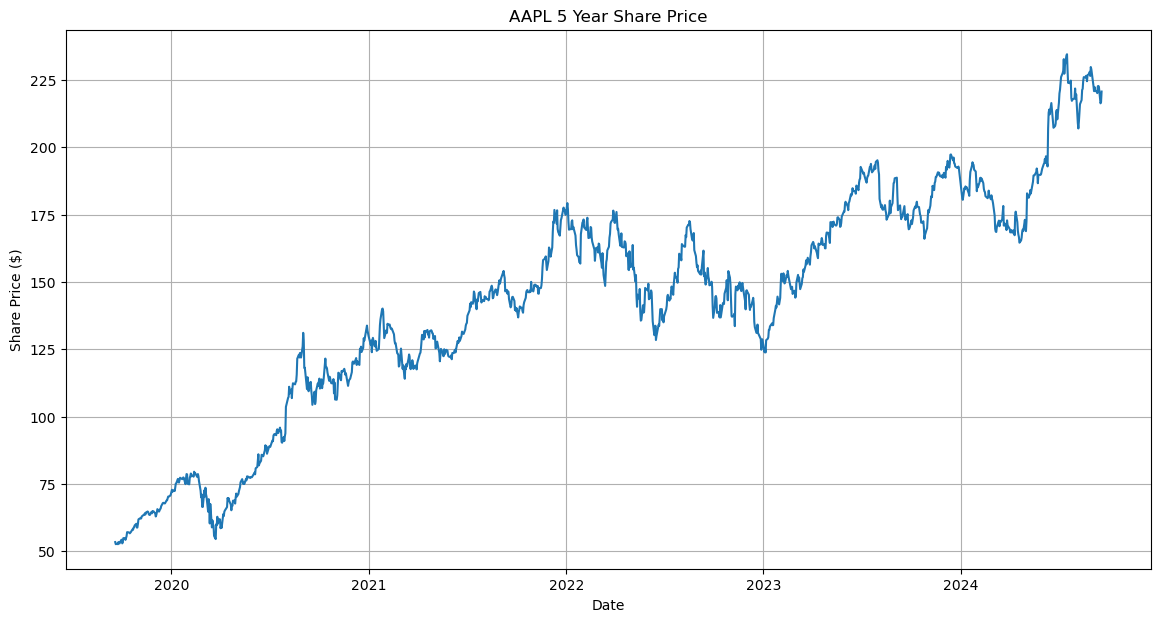

In [20]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(hist.index, hist['Close'])
plt.title('AAPL 5 Year Share Price')
plt.xlabel('Date')
plt.ylabel('Share Price ($)')
plt.grid(True)
plt.show()

In [6]:
# Get the financial data
aapl = yf.Ticker("AAPL")

# Get cash flow information
cashflow = aapl.cashflow

# Get the Free Cash Flow (FCF)
FCF = cashflow.loc['Free Cash Flow'].mean()

In [7]:
# Estimate future FCF
growth_rate = [0.05] * 5 + [0.03] * 5  # assumed growth rates
years = 10  # number of years for the projection
future_FCF = np.array([FCF * (1 + growth_rate[i])**i for i in range(years)])

In [27]:
# Convert to billions
future_FCF_in_billions = future_FCF / 1e9

# Create a DataFrame
df = pd.DataFrame({
    'Year': np.arange(1, years + 1),
    'Growth Rate': growth_rate,
    'Future FCF (in billions)': future_FCF_in_billions
})

# Display the DataFrame
df

,Year,Growth Rate,Future FCF (in billions)
0,1,0.05,94.336250
1,2,0.05,99.053062
2,3,0.05,104.005716
3,4,0.05,109.206001
4,5,0.05,114.666301
5,6,0.03,109.361569
6,7,0.03,112.642416
7,8,0.03,116.021688
8,9,0.03,119.502339
9,10,0.03,123.087409


In [11]:
# Discount the future FCF to get the present value
discount_rate = 0.10  # assumed discount rate
present_value_FCF = sum(future_FCF / (1 + discount_rate)**np.arange(1, years+1))

In [21]:
# Calculate the terminal value
terminal_growth_rate = 0.03  # assumed terminal growth rate
terminal_value = future_FCF[-1] * (1 + terminal_growth_rate) / (discount_rate - terminal_growth_rate)

# Discount the terminal value to get its present value
present_value_terminal_value = terminal_value / (1 + discount_rate)**years

In [22]:
# Get the number of outstanding shares
outstanding_shares = aapl.info['sharesOutstanding']

# Calculate the intrinsic value of the stock
intrinsic_value_per_share = (present_value_FCF + present_value_terminal_value) / outstanding_shares

In [28]:
# Display the intrinsic value per share
print(f"The intrinsic value per share is: ${intrinsic_value_per_share:.2f}")

The intrinsic value per share is: $89.56


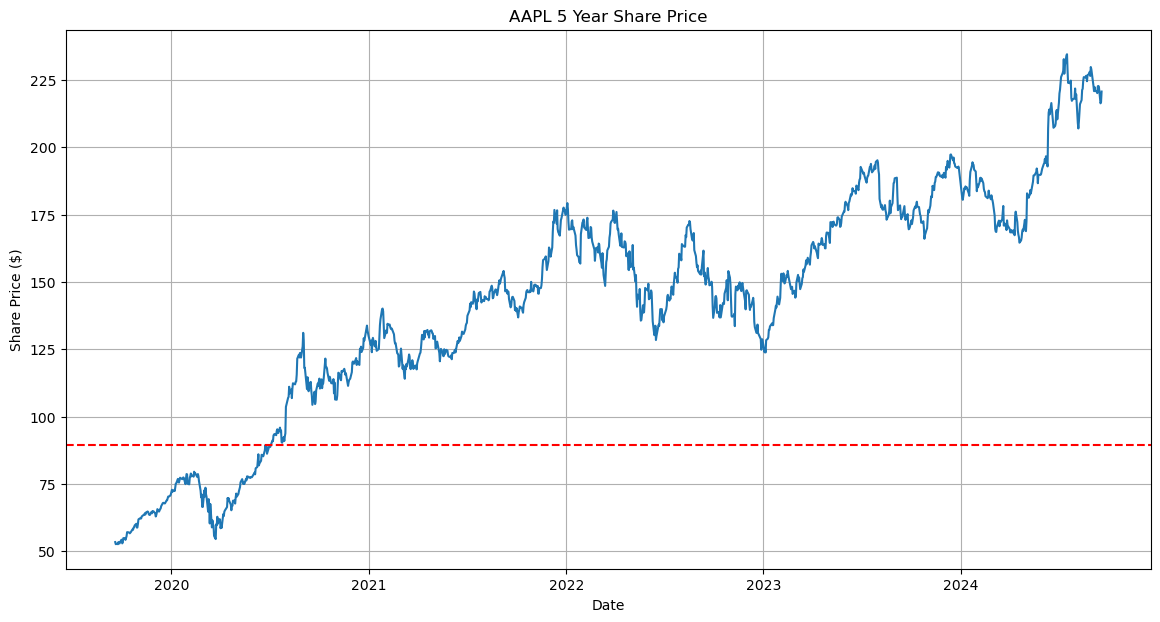

In [24]:
# Plot the data with the calculated intrinsic value
plt.figure(figsize=(14, 7))
plt.plot(hist.index, hist['Close'])
plt.axhline(y=intrinsic_value_per_share, color='r', linestyle='--')
plt.title('AAPL 5 Year Share Price')
plt.xlabel('Date')
plt.ylabel('Share Price ($)')
plt.grid(True)
plt.show()